<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/Copy_of_FoTo_GMM_SV3_mu_q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rm -r *.*

In [ ]:
down_count=0

# **Download Data Functions(Documents)**

In [ ]:
#@title Download Data Function
def download_data(data):
  data = data.lower()
  if data == 'reuters':
    download_reuters()
  elif data == 'twenty_news':
    download_twenty_news()
  elif data == 'crowdgender':
   download_unzip_crowdgender()
  elif data == 'bbc':
   download_unzip_bbc()
  elif data == 'webkb':
    download_webkb()
  elif data == 'wos':
    download_WoS()

In [ ]:
def download_twenty_news():
  !wget https://www.dropbox.com/s/09y9y1h0xk3cxaj/embeddings_twentynews.pkl
  !wget https://www.dropbox.com/s/ewv3vcwgll0r8a7/data_twentynews_labels.pkl
  !wget https://www.dropbox.com/s/chpjn9lzr7rmn2k/fixed_data_twentynews_preprocessed.pkl

In [ ]:
def download_reuters():
  !wget https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
  !wget https://www.dropbox.com/s/bgc1ht0jsyjed6s/embeddings_reuters.pkl
  !wget https://www.dropbox.com/s/9fk30bjzeefvhgl/data_reuters_preprocessed.pkl

In [ ]:
def download_webkb():
  !wget https://www.dropbox.com/s/wz88fk42r0viqvo/data_webkb_preprocessed.pkl
  !wget https://www.dropbox.com/s/8oi5qactwrar1ad/data_webkb_labels.pkl
  !wget https://www.dropbox.com/s/go7r4h39q6l01d5/embeddings_webkb.pkl

In [ ]:
def download_WoS():
  !wget https://www.dropbox.com/s/c6wlr148lhwsbaz/embeddings_wos.pkl
  !wget https://www.dropbox.com/s/j96061ln6oeejkf/data_wos_preprocessed.pkl
  !wget https://www.dropbox.com/s/kiffa4nidkjt7wi/data_wos_labels.pkl

In [ ]:
import os
def download_unzip_crowdgender():
  !wget https://www.dropbox.com/s/trz5uph29b0t0eg/data_crowder.zip
  os.system('unzip data_crowder.zip')

In [ ]:
def download_unzip_bbc():
  !wget https://www.dropbox.com/s/2m1gbuvk1lz151j/data_bbc-headlines_abstract.zip
  os.system('unzip data_bbc-headlines_abstract.zip')

# Downloading Data (Run Once)

In [ ]:
d_data= 'bbc' # reuters, twenty_news, webkb, wos, crowdgender,bbc

In [ ]:
#### Data Downloading ####
if down_count == 0:
  download_data(d_data) ### Run Once
  down_count =1

--2021-05-17 04:40:53--  https://www.dropbox.com/s/2m1gbuvk1lz151j/data_bbc-headlines_abstract.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2m1gbuvk1lz151j/data_bbc-headlines_abstract.zip [following]
--2021-05-17 04:40:53--  https://www.dropbox.com/s/raw/2m1gbuvk1lz151j/data_bbc-headlines_abstract.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc78c5d06fb9adfab7f730191618.dl.dropboxusercontent.com/cd/0/inline/BOqtJx6H2L6ro_F_-3ymwQjVhdZ2z4H9vO_7gSrGIvcv0UYHxXq1GV9nAK5ixNSAwMzwWpowRAvdzJSxXvfHiMATD75A-0nmEDgmMpN57CoDfop4dCpImi1nUHzhiPqrhktHqZlOgmImrobRyJXRg-2K/file# [following]
--2021-05-17 04:40:53--  https://uc78c5d06fb9adfab7f730191618.dl.dropboxusercontent.com/cd/0/inline/BOqtJx6H2L6ro_F_-3ymwQjVhdZ2z4H9v

#**0. Just Run these..**

In [ ]:
# @title Imports
# from sympy.stats import RaisedCosine, density
import torch
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd
from torch import Tensor
from torch import nn
import re
from time import time
import numpy as np
import collections
import gc
from sklearn.feature_extraction.text import CountVectorizer
import torch.nn
cos_sim = nn.CosineSimilarity(dim=-1,eps=1e-08)
# from nltk.corpus import stopwords

In [ ]:
#@title torch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Parameter
import math

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#@title Data Loading functions..

def load_bbc():
  data_preprocessed = load_obj('doc_preprocessed_nonzeroes')
  data_preprocessed_labels = load_obj("doc_preprocessed_nonzeroes_labels")
  embeddings = load_obj('embeddings')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_bbc.__name__

def load_crowdgender():
  data_preprocessed = load_obj('data_crowdgender_preprocessed')
  data_preprocessed_labels = load_obj("data_crowdgender_labels")
  embeddings = load_obj('embeddings_crowdgender')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_crowdgender.__name__

def load_reuters():
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_reuters.__name__

def new_50_twenty_news():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_docs')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_docs")
  return data_preprocessed,data_preprocessed_labels,embeddings,new_50_twenty_news.__name__

def new_50_twenty_news_sent():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_sent")
  doc_sent_id = load_obj('50_doc_id_sent')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,new_50_twenty_news_sent.__name__


def load_20News_50():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_docs_preprocessed')
  data_preprocessed_labels = load_obj("50_docs_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_50.__name__

def load_20News_50_sentences():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_data_load_20news_sentences_preprocessed')
  data_preprocessed_labels = load_obj("50_data_load_20news_sentences_labels")
  doc_sent_id = load_obj('50_doc_id_sent_load_20news_sentences')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_50_sentences.__name__

def load_20News():
  embeddings = load_obj('embeddings_twentynews')
  # data_preprocessed = load_obj('data_twentynews_preprocessed')
  data_preprocessed = load_obj('fixed_data_twentynews_preprocessed')
  data_preprocessed_labels = load_obj("data_twentynews_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News.__name__

def load_20News_sentences():
  embeddings = load_obj('embeddings_twentynews_sent')
  data_preprocessed = load_obj('data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("data_twentynews_labels_sent")
  doc_sent_id = load_obj('doc_id_sent_twentynews')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_sentences.__name__

def load_20News_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed.extend(load_obj('data_20News_preprocessed'))
  data_preprocessed_labels.extend(load_obj("data_20news_preprocessed_labels"))
  embeddings.update(load_obj('embeddings_20news'))
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_reuters.__name__

def load_r52():
  data_preprocessed = load_obj('data_r52_preprocessed')
  data_preprocessed_labels = load_obj("data_r52_labels")
  embeddings = load_obj('embeddings_r52')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_r52.__name__

def load_WebKb():
  data_preprocessed = load_obj('data_webkb_preprocessed')
  data_preprocessed_labels = load_obj("data_webkb_labels")
  embeddings = load_obj('embeddings_webkb')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WebKb.__name__

def load_WoS():
  data_preprocessed = load_obj('data_wos_preprocessed')
  data_preprocessed_labels = load_obj("data_wos_labels")
  embeddings = load_obj('embeddings_wos')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WoS.__name__
def load_arXiv():
  data_preprocessed = load_obj('data_arxiv_preprocessed')
  data_preprocessed_labels = load_obj("data_arxiv_labels")
  embeddings = load_obj('embeddings_arxiv')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_arXiv.__name__

In [ ]:
# @title get_keywords
def get_keywords(data):
  keywords_arxiv = ['molecular ','stimulation','liquid','fluid']
  keywords_webkb = ['student','department','india']
  keywords_r52 = ['mutual','fund','market','money']

  keywords_WoS = ['pediatric','protein','clone']
  keywords_20News_Reuters = ['oil','price','opec','bpd','barrel','saudi','production','mln','crude']

  # keywords_reuters = ['company', 'analyst', 'offer', 'pct', 'takeover', 'merger', 'record', 'dividend', 'pay', 'stock']
  # keywords_reuters = ['stock', 'dividend', 'inc']
  # keywords_reuters = ['oil','crude','ship']
  # keywords =['stock']
  keywords_reuters = ['usa','america']
  # keywords_reuters = ['oil','country']
  # keywords_reuters = ['stock','interest']
  # keywords_reuters = ['children','kids','young']
  # keywords_reuters =['pct', 'takeover', 'merger']
  # keywords_reuters = ['oil','tanker','ship']
  keywords_bbc = ['','game','baseball']

  keywords_crowdgender = ['housewife','girl','beautiful','blonde']

  keywords_20News = ['sport','game','baseball']
  # keywords_20News = ['looking' ,'add', 'voice' ,'input', 'capability', 'user', 'interface']
  keywords_bbc=['strike','nuclear','terror']
  data = data.lower()
  if data=='reuters': keywords = keywords_reuters
  elif data=='twenty_news':keywords = keywords_20News
  elif data=='crowdgender':keywords = keywords_crowdgender
  elif data=='webkb':keywords = keywords_webkb
  elif data=='bbc':keywords = keywords_bbc
  else:
    print('keyword list not found!!!')
  return keywords

In [ ]:
#@title DESM Score
def cosine_similarity_desm_docs(query_list, train_vec, vocab, embeddings):
  num_docs = len(train_vec)
  num_voc = len(vocab)
  sim_list = torch.zeros(num_docs)
  index = 0
  id_vocab = dict(map(reversed, vocab.items()))
  for d in range(num_docs):
    if(d%5000==0): print(d)
    doc_bar = torch.zeros(300)
    doc_length = 0
    for v in range(num_voc):
      if(train_vec[d][v] > 0):
        doc_bar.add_(train_vec[d][v] * torch.from_numpy(embeddings[id_vocab[v]])/torch.norm(torch.from_numpy(embeddings[id_vocab[v]])))
        doc_length = doc_length + train_vec[d][v]
    doc_bar = doc_bar / doc_length
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

# **1. Data Loading**

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
def doc_remove_extra_stopwords(doc):
  extra_stopwords = ['la','wa','will','fa','ha','pa','co','v','said']
  doc = word_tokenize(doc)
  doc = filter(lambda x:x not in extra_stopwords, doc)
  doc = ' '.join(e for e in doc)
  return doc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# ##### Data loading #####
loaded_data = load_bbc()
##########################

data_preprocessed , data_preprocessed_labels , embeddings, name = loaded_data
for d in range(len(data_preprocessed)):
  data_preprocessed[d] = doc_remove_extra_stopwords(data_preprocessed[d])
print(name,len(data_preprocessed_labels),len(data_preprocessed),len(embeddings))

load_bbc 2225 2225 5695


In [ ]:
preprossed_data = data_preprocessed
train_label = data_preprocessed_labels
vectorizer = CountVectorizer(min_df=10)
train_vec = vectorizer.fit_transform(preprossed_data).toarray()
vocab = vectorizer.vocabulary_
id_vocab = dict(map(reversed, vocab.items()))
nonzeros_indexes = np.where(train_vec.any(1))[0]
train_vec_non_zeros = [train_vec[i] for i in nonzeros_indexes]
preprossed_data_non_zeros = [preprossed_data[i] for i in nonzeros_indexes]
train_label = [data_preprocessed_labels[i] for i in nonzeros_indexes]
train_vec = np.asanyarray(train_vec_non_zeros)
keywords = get_keywords(d_data)
print(train_vec)
print(train_label)
print(vocab)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
['business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'bu

In [ ]:
# all_rscores = cosine_similarity_desm_docs(keywords,train_vec,vocab,embeddings)
# scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
# normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
# normalized_all_rscores=torch.tensor(normalized_all_rscores.flatten())
# rounded_normalized_all_rscores = torch.round(normalized_all_rscores*10)/10.0

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor_train_w = torch.from_numpy(train_vec).float()
train_label = np.asarray(train_label)

num_coordinate = 2
bs = 256
en1_units_x = 100
en2_units_x = 100
num_input = train_vec[0].shape[0]
learning_rate = 0.001
beta1 = 0.99
beta2 = 0.999
drop_rate = 0.2
num_topic = 10
# variance_x = 1.0/(0.1*num_topic)
variance_x = 1.0
gc.collect()

38206

# **Cosine Scores**

In [ ]:
import torch.nn
cos_sim = nn.CosineSimilarity(dim=-1, eps=1e-8)
def flatten_list(user_list): return [item for sublist in user_list for item in sublist]
def get_embedding_tensor(word_list,embeddings): return torch.tensor([embeddings[w] for w in word_list])
def cosine_angular_sim(keyword_torch,words_tensor): return 1 - (torch.acos(cos_sim(keyword_torch,words_tensor))) / torch.pi
def cosine_norm_01(keyword_torch,words_tensor): return (cos_sim(keyword_torch,words_tensor) + 1.0)/2.0
def cosine_sqrt(keyword_torch,words_tensor): return 1 - ((1 - cos_sim(keyword_torch,words_tensor) )/2)**0.5

In [ ]:
def cosine_keywords(keywords,words_tensor,word_list):
  all_keywords_score = torch.empty(len(keywords),len(vocab))
  cosine_score_vocab = {}
  keyword_total_score = torch.zeros(len(vocab))
  kidx = 0
  for k in keywords:
    keyword_torch = torch.from_numpy(embeddings[k])
    keyword_torch = keyword_torch.unsqueeze(0).expand(len(vocab),words_tensor.shape[1])
    # all_keywords_score.append(cosine_sqrt(keyword_torch,words_tensor))
    all_keywords_score[kidx] = cosine_sqrt(keyword_torch,words_tensor)
    kidx = kidx +1
    # keyword_total_score += cos_sim(keyword_torch,words_tensor)
  keywords_max_score,keyword_max_score_idx = torch.max(all_keywords_score,dim=0)
  cosine_score_vocab = dict(zip(word_list,keywords_max_score.numpy()))
  return all_keywords_score,keyword_total_score/len(keywords),keywords_max_score,cosine_score_vocab

In [ ]:
sorted_id_word_vocab = sorted(id_vocab.items(), key=lambda x: x[1]) ### alphabetically sorted
word_list = [s[1] for s in sorted_id_word_vocab]
words_tensor = get_embedding_tensor(word_list,embeddings)

all_keywords_score,keywords_mean_score,keywords_max_score,cosine_score_vocab = cosine_keywords(keywords,words_tensor,word_list)

sorted_cosine_words_vocab = sorted(cosine_score_vocab.items(), key=lambda x: x[1]) ### cosine sim score sorted
sorted_cosine_vocab = [s[0] for s in sorted_cosine_words_vocab]

embedding_tensor_sorted_alp = get_embedding_tensor(word_list,embeddings)
embedding_tensor_keywords = get_embedding_tensor(keywords,embeddings)
embedding_tensor_sorted_cos = get_embedding_tensor(sorted_cosine_vocab,embeddings)
num_keyword = embedding_tensor_keywords.shape[0]
emb_size = embedding_tensor_keywords.shape[1]

In [ ]:
val,idx=torch.sort(keywords_max_score,descending=True)
cosine_flag_testing = torch.zeros(num_input)
cosine_flag_testing[idx[0:500]] = 1.0
# cosine_flag_testing  = cosine_flag_testing.to(device)
ranked_input = torch.ones(num_input)
for i in range(1,num_input+1,1):
  ranked_input[idx[i-1]] = i

In [ ]:
cosine_idx_test = torch.tensor(np.arange(0,num_input))
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
cosine_idx_test_sc = scaler.fit_transform(cosine_idx_test.data.reshape(-1,1))

((array([478., 120.,   7.,   1.,   0.,   0.,   0.,   0.,   0.,   2.]),
  array([0.27698046, 0.3492824 , 0.42158437, 0.49388632, 0.5661883 ,
         0.6384902 , 0.7107922 , 0.78309417, 0.8553961 , 0.927698  ,
         1.        ], dtype=float32),
  <a list of 10 Patch objects>),
 0.33043516)

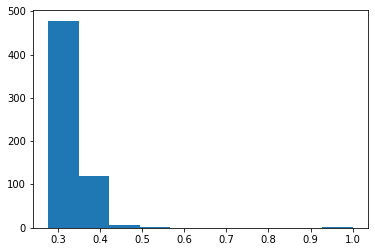

In [ ]:
plt.hist(keywords_max_score),np.median(keywords_max_score)

(array([108.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

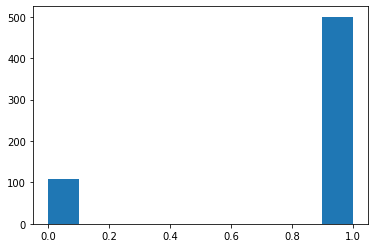

In [ ]:
plt.hist(cosine_flag_testing)

# torch_functions_extra

In [ ]:
# embdding_input_NV300 = embedding_tensor_sorted_alp.unsqueeze(0).expand(tensor_train_w.shape[0],embedding_tensor_sorted_alp.shape[0],embedding_tensor_sorted_alp.shape[1])
# tensor_train_w_input = tensor_train_w
# y = torch.ones(tensor_train_w.size())
# w_input = torch.where(tensor_train_w_input >= 1, y, tensor_train_w_input)
# docWord_embedding_input = w_input.unsqueeze(-1).expand(w_input.shape[0],w_input.shape[1],300) * embdding_input_NV300

# def Log_NormDist_wC(x,mu,sigma=sig0,sigma_ir=sigc,d=emb_size):
#   x_Q = torch.narrow(x,1,0,x.shape[1]-1) # First Q (KxQx300)
#   mu_Q = torch.narrow(mu,1,0,mu.shape[1]-1) # First (KxQx300)
#   x_C_ir = torch.narrow(x,1,x.shape[1]-1,1) # Last C (Kx1x300)
#   mu_C_ir = torch.narrow(mu,1,mu.shape[1]-1,1) # Last C (Kx1x300)

#   First_Q = d/2.0 * torch.log(torch.tensor(sigma/(2.0*pi)))
#   Second_Q = -(sigma/2.0) * (torch.norm(x_Q-mu_Q,dim=-1)**2)

#   First_C_ir = d/2.0 * torch.log(torch.tensor(sigma_ir/(2.0*pi)))
#   Second_C_ir = -(sigma_ir/2.0) * (torch.norm(x_C_ir-mu_C_ir,dim=-1)**2)

#   First = First_Q+First_C_ir
#   Second = torch.cat((Second_Q,Second_C_ir),dim=1)
#   ret = First + Second

#   return ret

def min_max_normalization(ip):
  vmax,_ = torch.max(ip,-1)
  vmin,_ = torch.min(ip,-1)
  vmax = vmax.unsqueeze(-1).expand(ip.shape[0],ip.shape[1])
  vmin= vmin.unsqueeze(-1).expand(ip.shape[0],ip.shape[1])
  ip = (ip - vmin) / (vmax-vmin+smoothen)
  return ip

def NewBeta_dist(x,mu,phi_beta,smoothen):
  First = torch_lgamma(phi_beta+smoothen) - (torch_lgamma(phi_beta * mu+smoothen) + torch_lgamma(phi_beta * (1-mu)+smoothen ))
  Second_1 = (mu*phi_beta-1) * torch.log(x+smoothen)
  Second_2 = ( (1-mu)*phi_beta-1 )* torch.log(1-x+smoothen)
  Second = Second_1 + Second_2
  return First + Second

def LogL_NewBeta(x,relevant_scores):
  x_norm = torch.norm(x,dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/mu_div)
  # LogL = torch.log(NewBeta_dist(relevant_scores,mu,sig,smoothen)+smoothen)
  LogL = NewBeta_dist(relevant_scores,mu,100.0,smoothen)
  return LogL

def log_bmm(a: Tensor, b: Tensor) -> Tensor:
    """Performs a batch matrix-matrix product of matrices in log-space.
    Args:
        a: tensor with shape (b, n, m)
        b: tensor with shape (b, m, p)
    Returns:
        tensor with shape (b, n, p)
    """

    assert a.ndim == b.ndim == 3
    assert a.size(0) == b.size(0)
    assert a.size(2) == b.size(1)

    bsz, p, m = a.size()
    _, _, n = b.size()
    a = a.unsqueeze(2).expand(bsz, p, n, m)
    b = b.unsqueeze(1).transpose(2, 3).expand(bsz, p, n, m)
    return torch.logsumexp(a + b, dim=-1)

In [ ]:
# a = torch.ones(12,10) * 4
# b = torch.ones(2,1)
# torch.norm(b,dim=0)
###
# for i in range(12):
#   a[i] = i
# a.unsqueeze(1).expand(12,5,10)
###
# x = torch.rand(5,4,3)
# a=torch.narrow(x,1,0,x.shape[1]-1) # First
# b=torch.narrow(x,1,x.shape[1]-1,1) # Last
# torch.cat((a,b),dim=1)
###
# a = torch.Tensor(10,3367,300)
# b = embedding_0_center_words.unsqueeze(0).expand(10,3367,300)
# c = torch.norm(a-b,dim=-1)**2

# Current Working Model

In [ ]:
torch.cuda.empty_cache()
pi = torch.acos(torch.zeros(1)).item() * 2
smoothen=1e-20

sig0=1.0/1000
sig_mu_z = 1.0/100000
sig_phi = 1.0 / (0.1*len(data_preprocessed))
#sig_phi = 0.1


def torch_lgamma(a): return torch.lgamma(torch.tensor(a))
def torch_gamma(a): return torch.exp(torch.lgamma(torch.tensor(a)))

def NormDist(x,mu,sigma=sig0,d=emb_size):
    return (sigma/(2*pi))**(d/2.0) * torch.exp( (-sigma/2.0) * torch.norm(x-mu,dim=-1)**2.0 )

def Log_NormDist(x,mu,sigma,d=emb_size):
  First = d/2.0 * torch.log(torch.tensor(1/(2.0*pi*sigma)))
  Second = -(1/(2.0*sigma)) * (torch.norm(x-mu,dim=-1)**2)
  ret = First + Second
  return ret

#phi
def gaussian(alpha): return -0.5*alpha
def inverse_multi_quadric(alpha): return -0.5*torch.log(torch.ones_like(alpha) + alpha)
def inverse_quadratic(alpha): return -torch.log(torch.ones_like(alpha) + alpha)

class Model(nn.Module):
    def __init__(self, num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs,
                 embedding_words, word_emb_size, distance="gaussian"):

        super(Model, self).__init__()
        self.num_input, self.num_coordinate, self.num_topic, self.variance_x, self.bs \
            = num_input, num_coordinate, num_topic, variance_x, bs

        self.embedding_words = embedding_words
        self.emb_size = word_emb_size

        # encoder
        self.en1_fc     = nn.Linear(num_input, en1_units_x)
        self.en2_fc     = nn.Linear(en1_units_x, en2_units_x)
        self.en2_drop   = nn.Dropout(drop_rate)
        self.mean_fc    = nn.Linear(en2_units_x, num_coordinate)
        self.mean_bn    = nn.BatchNorm1d(num_coordinate)
        self.logvar_fc  = nn.Linear(en2_units_x, num_coordinate)
        self.logvar_bn  = nn.BatchNorm1d(num_coordinate)

        # RBF
        self.in_features = self.num_coordinate
        self.out_features = self.num_topic
        self.centres = nn.Parameter(torch.Tensor(self.out_features, self.in_features)) # K x 2
        self.mu_z = nn.Parameter(torch.Tensor(self.out_features,self.emb_size))# K x 300

        if distance=="gaussian": self.basis_func = gaussian
        if distance=="inverse_quadratic": self.basis_func = inverse_quadratic
        if distance=="inverse_multi_quadric": self.basis_func = inverse_multi_quadric
        self.init_parameters()

        # decoder document
        self.decoder_phi_bn = nn.BatchNorm1d(num_coordinate)                      # bn for decoder
        self.decoder_x_bn = nn.BatchNorm1d(num_coordinate)
        self.deocder_mu_z_bn = nn.BatchNorm1d(self.num_topic)

        # prior mean and variance as constant buffers
        prior_mean   = torch.Tensor(1, num_coordinate).fill_(0)
        prior_var    = torch.Tensor(1, num_coordinate).fill_(variance_x)
        self.prior_mean = nn.Parameter(prior_mean, requires_grad=False)
        self.prior_var  = nn.Parameter(prior_var, requires_grad=False)
        self.prior_logvar = nn.Parameter(prior_var.log(), requires_grad=False)

    def init_parameters(self):
        nn.init.normal_(self.centres,0, 0.01)
        nn.init.normal_(self.mu_z,0,0.01)

    def encode(self, input_):
        N, *_ = input_.size()
        en1 = F.softplus(self.en1_fc(input_))                           # en1_fc   output
        en2 = F.softplus(self.en2_fc(en1))                              # encoder2 output
        en2 = self.en2_drop(en2)
        posterior_mean   = self.mean_bn(self.mean_fc(en2))          # posterior mean
        posterior_logvar = self.logvar_bn(self.logvar_fc(en2))          # posterior log variance
        posterior_var    = posterior_logvar.exp()

        return en2, posterior_mean, posterior_logvar, posterior_var

    def take_sample(self, input_, posterior_mean, posterior_var, prior_var):
        eps = input_.data.new().resize_as_(posterior_mean.data).normal_(std=1) # noise
        z = posterior_mean + posterior_var.sqrt() * eps                   # reparameterization
        return z

    def get_beta(self):
      size_KV300 = (self.num_topic,self.num_input,self.emb_size) # KxVx300
      kv_wnm = self.embedding_words.unsqueeze(0).expand(size_KV300)
      # mu_z_bn = self.deocder_mu_z_bn(self.mu_z.T).T
      # kv_mu_z = mu_z_bn.unsqueeze(1).expand(size_KV300)
      kv_mu_z = self.mu_z.unsqueeze(1).expand(size_KV300)
      wmn_normal = Log_NormDist(kv_wnm,kv_mu_z,sig0) # K x V
      return wmn_normal

    def decode(self, z):

        ## Theta - P(z|x,phi)
        N, *_ = z.size()
        # zx = self.decoder_x_bn(z).view(N, 1, self.num_coordinate) # Nx1x2
        zx = z.view(N, 1, self.num_coordinate) # Nx1x2
        size = (N, self.out_features, self.in_features) # N,K,2
        x = zx.expand(size)
        # c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)
        c = self.centres.unsqueeze(0).expand(size)
        d = (x-c).pow(2).sum(-1)
        distances = self.basis_func(d)
        zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True)) # N x K

        beta = self.get_beta()
        recon_v = log_bmm(torch.log(zx_phi+smoothen).unsqueeze(0),beta.unsqueeze(0)).squeeze(0)

        # MAP_LOSS
        map_phi = -Log_NormDist(x=self.centres,mu=0.0,sigma=sig_phi,d=2).sum(0)
        map_mu_z = -Log_NormDist(x=self.mu_z,mu=0.0,sigma=sig_mu_z,d=300).sum(0)
        map_loss = map_mu_z + map_phi
        return recon_v, zx, zx_phi, d,map_loss

    def forward(self, input_, compute_loss=False):
        en2, posterior_mean, posterior_logvar, posterior_var = self.encode(input_)
        z = self.take_sample(input_, posterior_mean, posterior_var, self.variance_x)
        recon_v, zx, zx_phi,d,map_loss= self.decode(z)

        if compute_loss:
            return recon_v, self.loss(input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d,zx,map_loss)
        else: return z, recon_v, zx, zx_phi

    def KLD(self, posterior_mean,posterior_logvar,posterior_var):
        N = posterior_mean.shape[0]
        prior_mean   = self.prior_mean.expand_as(posterior_mean)
        prior_var    = self.prior_var.expand_as(posterior_mean)
        prior_logvar = self.prior_logvar.expand_as(posterior_mean)

        var_division    = posterior_var  / prior_var
        diff            = posterior_mean - prior_mean
        diff_term       = diff * diff / prior_var
        logvar_division = prior_logvar - posterior_logvar

        xKLD = 0.5 * ((var_division + diff_term + logvar_division).sum(-1) - self.num_coordinate)
        return xKLD

    def loss(self, input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, zx, map_loss,avg=True):
        N = posterior_mean.shape[0]

        # NL = - (input_ * (recon_v +1e-30).log()).sum(-1) # (Word_Count_input_loss)
        NL = - (input_ * recon_v).sum(-1) # (Word_Count_input_loss)
        NL= NL.sum()
        KLD = self.KLD(posterior_mean,posterior_logvar,posterior_var).sum()

        loss = NL + KLD
        return loss/N, NL,KLD,map_loss/n_batch

In [ ]:
embedding_tensor_words = embedding_tensor_sorted_alp ## alphabetically sorted Vocab
embedding_0_center_words = embedding_tensor_words - embedding_tensor_words.mean(0)
embedding_tensor_words_d = embedding_0_center_words.to(device)

kld_arr,recon_arr,neg_log_rscore_arr = [],[],[]
all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)
n_batch = len(all_indices)

model = Model(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs,
              embedding_tensor_words_d,emb_size, "gaussian")

model.to(device)

optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2))

epochs = 500

for epoch in range(epochs):

    loss_u_epoch = 0.0 ## NL loss
    loss_KLD = 0.0  ## KL loss
    loss_epoch = 0.0 ## Loss per batch #
    neg_log_rscore_ep = 0.0 ## Neg Loss (Score)

    model.train()

    for batch_ndx in all_indices:

        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        recon_v, (loss, loss_u, xkl_loss, neg_log_rscore) = model(input_w,compute_loss=True)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()             # backpror.step()
        loss_epoch += loss.item()
        loss_u_epoch += loss_u.item()
        loss_KLD += xkl_loss.item()
        neg_log_rscore_ep += neg_log_rscore.item()

    kld_arr.append(loss_KLD)
    recon_arr.append(loss_u_epoch)
    neg_log_rscore_arr.append(neg_log_rscore_ep)

    if epoch % 10 == 0:
        print('Epoch -> {} , loss -> {}'.format(epoch,loss_epoch))
        print('recon_loss==> {} || KLD==> {} || map_loss==> {}'.format(loss_u_epoch, loss_KLD,neg_log_rscore_ep))

Epoch -> 0 , loss -> 184082.0625
recon_loss==> 45277633.25 || KLD==> 3624.57666015625 || map_loss==> 4626.825439453125
Epoch -> 10 , loss -> 153660.931640625
recon_loss==> 37784686.5 || KLD==> 2596.83935546875 || map_loss==> 515511.13671875
Epoch -> 20 , loss -> 147704.5322265625
recon_loss==> 36321027.0 || KLD==> 2032.92578125 || map_loss==> 908977.109375
Epoch -> 30 , loss -> 145745.8017578125
recon_loss==> 35843448.0 || KLD==> 1639.1393737792969 || map_loss==> 998750.015625
Epoch -> 40 , loss -> 144370.6748046875
recon_loss==> 35502804.75 || KLD==> 1327.4211044311523 || map_loss==> 1042927.8515625
Epoch -> 50 , loss -> 143717.3056640625
recon_loss==> 35342336.5 || KLD==> 1105.9950790405273 || map_loss==> 1071370.359375
Epoch -> 60 , loss -> 143453.927734375
recon_loss==> 35279046.0 || KLD==> 1005.3847579956055 || map_loss==> 1049919.84375
Epoch -> 70 , loss -> 143354.935546875
recon_loss==> 35254580.0 || KLD==> 1040.7220153808594 || map_loss==> 1029722.6484375
Epoch -> 80 , loss -> 

# **Functions (Plot_loss, get_topwords, get_Z, get_Contour, print_Topics)** - *Run Once*

In [ ]:
#@title get_all_tensor_size
def getall_tensor_size():
  for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size(),get_mem_size(obj))
    except:
        pass

In [ ]:
import plotly.graph_objects as go
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

In [ ]:
def get_topwords(beta, id_vocab):
    topic_indx = 0
    no_of_topwords = 20
    topwords_topic = []
    for i in range(len(beta)):
        topwords_topic.append(str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-no_of_topwords - 1:-1]]))
        topic_indx+=1
    return topwords_topic

In [ ]:
def get_Z(X,Y):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])

      norms[i][j] = torch.norm(v)
      Z[i][j]=torch.exp(-0.5 * (torch.pow(norms[i][j],2))/mu_div)

      # norms[i][j] = (v-query_center.T).pow(2).sum(-1)
      # Z[i][j]=torch.exp(-0.5 * norms[i][j]/mu_div)
  return Z

In [ ]:
def get_Contour(ax,x_list,lim):
  xlist = np.linspace(-lim, lim, 200)
  ylist = np.linspace(-lim, lim, 200)
  X, Y = np.meshgrid(xlist, ylist)
  Z = get_Z(X,Y)
  levels = np.arange(0,1,0.1)
  cp = ax.contour(X, Y, Z, levels=levels)
  ax.clabel(cp, inline=1, fontsize=10)

In [ ]:
import seaborn as sb

def plot_fig(zx, labels_list, zphi,lim,contour='No'):
    labels = []
    for i in range(len(labels_list)):
        labels.append('C'+str(labels_list[i]))
    fig, ax = plt.subplots( figsize=(20, 20))
    if contour=='yes':
       get_Contour(ax,zx,lim)

    sb.scatterplot(ax=ax,x=zx[:,0],y=zx[:,1],hue=labels_list,alpha=0.8,palette='deep')
    ax.set(ylim=(-lim,lim))
    ax.set(xlim=(-lim,lim))
    ax.text(0,0, 'X' ,c='black')
    ax.scatter(zphi[:, 0], zphi[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=30)

    for indx, topic in enumerate(zphi):
        ax.text(zphi[indx, 0], zphi[indx, 1], 'topic'+str(indx))

In [ ]:
def print_Topics():
  print("---"*10)
  topword_topics = get_topwords(beta, id_vocab)
  topword_topics_list=[]
  for topwords in topword_topics:
      topword_topics_list.append(topwords.split())
      print(topwords)
  print("---"*10)

# **Plots,Topics,Visualizations**

In [ ]:
plot_loss(neg_log_rscore_arr,"map")

In [ ]:
plot_loss(recon_arr,"Recon")

In [ ]:
model.eval()
x_list = []
labels_list = []
doc_ids = []
zx_phi_list=[]
with torch.no_grad():
    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        labels_list.extend(labels)

        z, recon_v, zx, zx_phi = model(input_w,compute_loss=False)
        zx = zx.view(-1, num_coordinate).data.detach().cpu().numpy()
        zx_phi = zx_phi.view(-1, num_topic).data.detach().cpu().numpy()
        zx_phi_list.extend(zx_phi)
        x_list.extend(zx)
        doc_ids.extend(batch_ndx)

    x_list = np.array(x_list)

    beta = model.get_beta().data.cpu().numpy()
    # zphi = model.decoder_phi_bn(model.centres).data.cpu().numpy()
    zphi = model.centres.data.cpu().numpy()

In [ ]:
print_Topics()

------------------------------
0: head official general called roddick group including executive time company president chief year late national day senior business leading angeles
1: roddick dublin angeles holmes american european gordon britain ferguson tv british bos february india robinson alan williams indian saturday spain
2: roddick team time play film movie game star day music playing country group year three player club night angeles work
3: time roddick including three called day work late early help left group move year country second angeles set long turn
4: roddick second time three third top final including left year big best late fourth day early half leading winning point
5: government country state time roddick day national public business people nation group year company including three work late help city
6: year month week day time summer weekend three night fall roddick season half second late including country group early third
7: company business roddick time tec

In [ ]:
get_keywords(d_data)

['strike', 'nuclear', 'terror']

In [ ]:
x_list

array([[-0.11070928,  0.15100867],
       [ 1.2761086 , -0.05255651],
       [-0.15858723,  1.1049597 ],
       ...,
       [-1.1216177 ,  1.8712304 ],
       [-0.8933679 ,  2.3764868 ],
       [ 0.33586514,  1.7754729 ]], dtype=float32)

In [ ]:
# query_center
# zphi
# x_list

In [ ]:
# a1 = np.exp(-0.5 * ((-0.9241141-0.326416)**2 + (1.080526-(-1.5733637)))**2)
# a2 = np.exp(-0.5 * ((-0.9241141-(-4.8322263))**2 + (1.080526-0.88595086))**2)
# a3 = np.exp(-0.5 * ((-0.9241141-1.10666)**2 + (1.080526-(-2.8282874)))**2)
# print(a1/(a1+a2+a3))
# print(a2/(a1+a2+a3))
# print(a3/(a1+a2+a3))

In [ ]:
# q_phi_exp

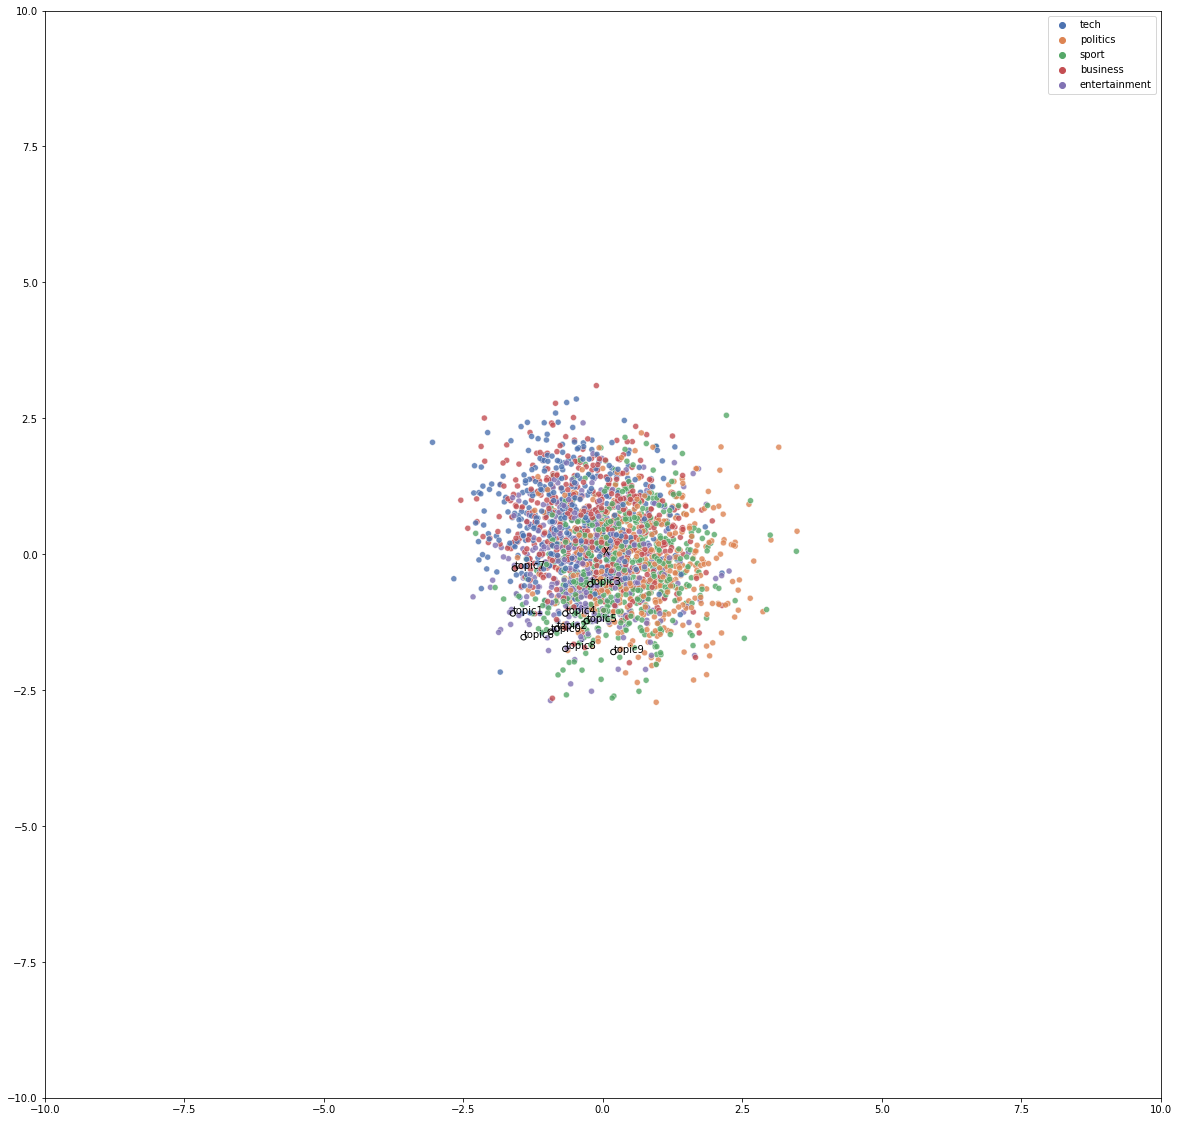

In [ ]:
plot_fig(x_list, labels_list, zphi,lim =10,contour='no')

# ____ STOP____

In [ ]:
STOP!!!!

SyntaxError: ignored

In [ ]:
STOP!!!!

In [ ]:
STOP!!!!

# Comments :

<5/6/21>
* Topic quality is good. We can see keywords and other words that are closely related to the keywords in the topics
* Visualization has some issues though. It can't form and all the documents seems to converge at a single coordinate.

<5/7/21>
* Introduced dimension 'C' as new irrelevant center (we are not visualizing that)
* WAF to have two diff sigmas , 1 for relv i.e query(Q) , 1 for irrelv for C
* First Q dim should have relv sigma, Last dim (for Center C) should have irrelv sigma

<5/15/21>
* Tried to implement QxV as decoder weight without query > result - Cluster with Q centers (Centered at Keyword)
** K topics essentially grouped into Q different topics , Works Like PLSV.
* **ToDo** - Implement GaussianSV with VAE (Short Paper)




# Save/Download Results

In [ ]:
doc_ids_model = [i.item() for i in doc_ids]

In [ ]:
save_obj(get_topwords(beta, id_vocab),"top100_docmodel_"+d_data)

In [ ]:
save_obj(x_list,"x_list")
save_obj(indices,"doc_id_desm")
save_obj(doc_ids_model,"doc_ids_model")
save_obj(labels_list,"labels_list")
save_obj(all_rscores,"all_rscores")
save_obj(keywords,'keywords_'+d_data)

In [ ]:
from google.colab import files
files.download("doc_ids_model.pkl")
files.download("doc_id_desm.pkl")
files.download("x_list.pkl")
files.download("labels_list.pkl")
files.download("all_rscores.pkl")
files.download("keywords_"+d_data+".pkl")
files.download("top100_docmodel_"+d_data+".pkl")

In [ ]:
rm -r *.pkl*